# Week 6-Assignment

## MSDS 600 - Introduction to Data Science

## Recommender Systems

## Professor: Dr. Aiman Gannous

### Prepared By: Danish Kamaal

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

# Load and explore data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Number of movies watched by User 2

In [5]:
movies_count_per_user = ratings.groupby('userId')['movieId'].count().reset_index(name='MovieIdCount')
movies_count_per_user 

,userId,MovieIdCount
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


In [6]:
display(movies_count_per_user.loc[movies_count_per_user.userId == 2])

,userId,MovieIdCount
1,2,29


Below is another way to filter User 2 Number of movies count.

In [7]:
print(movies_count_per_user.loc[1])

userId           2
MovieIdCount    29
Name: 1, dtype: int64


# Bar Chart of Movie Ratings

## Bar Chart - User 2 Movie Ratings

In [8]:
user_2_rating = ratings[ratings['userId'] == 2]
user_2_rating.head()

,userId,movieId,rating,timestamp
232,2,318,3.0,1445714835
233,2,333,4.0,1445715029
234,2,1704,4.5,1445715228
235,2,3578,4.0,1445714885
236,2,6874,4.0,1445714952


Text(0, 0.5, 'counts')

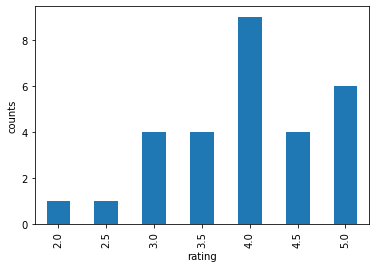

In [9]:
user_2_rating['rating'].value_counts().sort_index().plot.bar()
plt.xlabel('rating')
plt.ylabel('counts')

## Bar Chart - All Users Movie Ratings

Text(0, 0.5, 'counts')

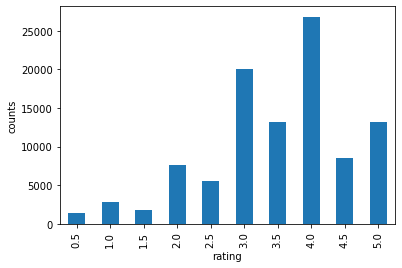

In [10]:
ratings['rating'].value_counts().sort_index().plot.bar()
plt.xlabel('rating')
plt.ylabel('counts')

# User 2's Top Movies

In [11]:
user2_top_movies = pd.merge(user_2_rating, movies, on='movieId')
user2_top_movies.sort_values(by='rating', ascending=False).head()

,userId,movieId,rating,timestamp,title,genres
28,2,131724,5.0,1445714851,The Jinx: The Life and Deaths of Robert Durst ...,Documentary
27,2,122882,5.0,1445715272,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
22,2,106782,5.0,1445714966,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
18,2,89774,5.0,1445715189,Warrior (2011),Drama
9,2,60756,5.0,1445714980,Step Brothers (2008),Comedy


# Collaborative Filtering Recommender

Transforming ratings DataFrame to "Wide" format for calculating similarities between users.

In [12]:
wide = ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pearson Correlation

In [13]:
cor = wide.T.corr()

In [14]:
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,2.719480e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


In [15]:
cor.loc[2].sort_values(ascending=False)

userId
2      1.0
341    1.0
93     1.0
143    1.0
148    1.0
      ... 
602    NaN
604    NaN
605    NaN
607    NaN
609    NaN
Name: 2, Length: 610, dtype: float64

In [16]:
wide.loc[2].notna().equals(wide.loc[341].notna())

False

### Pearson Correlation- Recommending Movies to User 2 based on Top Movies rated by User 341

In [17]:
rated_5_by_341_not_watched_by_2 = (wide.loc[341] == 5) & (wide.loc[2].isna())
print(wide.loc[2][rated_5_by_341_not_watched_by_2])
print(wide.loc[341][rated_5_by_341_not_watched_by_2])

movieId
1       NaN
59900   NaN
Name: 2, dtype: float64
movieId
1        5.0
59900    5.0
Name: 341, dtype: float64


## Euclidean Distance

In [18]:
wide.fillna(-1, inplace=True)

In [19]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)
    
from scipy.spatial.distance import euclidean

In [20]:
euclidean(wide.iloc[2], wide.iloc[341])

41.212862069989754

In [21]:
from scipy.spatial.distance import pdist, squareform

In [22]:
euclidean_distances = squareform(pdist(wide, metric=euclidean))

In [23]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [24]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


In [25]:
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

`User 341` which was next similar user to `User 2` using Pearson Correlation is not the closest user using Euclidean Distance.

In [26]:
euclidean_df.loc[2].sort_values().loc[341]

42.91852746774987

Checking Top Movie ratings given by `User 442` for recommending movies to `User 2`

In [27]:
#  Getting Top Rating Given by User 442 and Index of it.
print(wide.loc[442].max())
print(wide.loc[442].argmax())

2.5
320


In [28]:
# Getting Top Movies by User 442
user_442_rating = ratings[ratings['userId'] == 442]
user442_top_movies = pd.merge(user_442_rating, movies, on='movieId')
user442_top_movies.sort_values(by='rating', ascending=False).head()

,userId,movieId,rating,timestamp,title,genres
0,442,362,2.5,1331560498,"Jungle Book, The (1994)",Adventure|Children|Romance
19,442,4361,2.5,1331560492,Tootsie (1982),Comedy|Romance
2,442,524,2.0,1331560506,Rudy (1993),Drama
12,442,2908,2.0,1331560472,Boys Don't Cry (1999),Drama
17,442,3752,2.0,1331560582,"Me, Myself & Irene (2000)",Adventure|Comedy


### Euclidean Distance- Recommending Movies to User 2 based on Top Movies rated by User 442

As Highest rating given by `User 442` is 2.5, recommending movies to `User 2` by having filter that check movies with rating greater than or equal to 2.

In [29]:
rated_by_442_not_watched_by_2 = (wide.loc[442] >= 2) & (wide.loc[2] != '-1.0')
print(wide.loc[2][rated_by_442_not_watched_by_2])
print(wide.loc[442][rated_by_442_not_watched_by_2])

movieId
362    -1.0
524    -1.0
2145   -1.0
2908   -1.0
3752   -1.0
4361   -1.0
Name: 2, dtype: float64
movieId
362     2.5
524     2.0
2145    2.0
2908    2.0
3752    2.0
4361    2.5
Name: 442, dtype: float64


## Cosine Distance

In [30]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

`User 341` which was next similar user to `User 2` using Pearson Correlation is not the closest user using Cosine Distance.

In [31]:
cosine_df.loc[2].sort_values().loc[341]

0.0892952689103661

Cosine Distance like Euclidean Distance has `User 442` as next similar user to `User 2`

Checking Top Movie ratings given by `User 442` for recommending movies to `User 2`

In [32]:
#  Getting Top Rating Given by User 442 and Index of it.
print(wide.loc[442].max())
print(wide.loc[442].argmax())

2.5
320


In [33]:
# Getting Top Movies by User 442
user_442_rating = ratings[ratings['userId'] == 442]
user442_top_movies = pd.merge(user_442_rating, movies, on='movieId')
user442_top_movies.sort_values(by='rating', ascending=False).head()

,userId,movieId,rating,timestamp,title,genres
0,442,362,2.5,1331560498,"Jungle Book, The (1994)",Adventure|Children|Romance
19,442,4361,2.5,1331560492,Tootsie (1982),Comedy|Romance
2,442,524,2.0,1331560506,Rudy (1993),Drama
12,442,2908,2.0,1331560472,Boys Don't Cry (1999),Drama
17,442,3752,2.0,1331560582,"Me, Myself & Irene (2000)",Adventure|Comedy


### Cosine Distance- Recommending Movies to User 2 based on Top Movies rated by User 442

As Highest rating given by `User 442` is 2.5, recommending movies to `User 2` by having filter that check movies with rating greater than or equal to 2.

In [34]:
rated_by_442_not_watched_by_2 = (wide.loc[442] >= 2) & (wide.loc[2] != '-1.0')
print(wide.loc[2][rated_by_442_not_watched_by_2])
print(wide.loc[442][rated_by_442_not_watched_by_2])

movieId
362    -1.0
524    -1.0
2145   -1.0
2908   -1.0
3752   -1.0
4361   -1.0
Name: 2, dtype: float64
movieId
362     2.5
524     2.0
2145    2.0
2908    2.0
3752    2.0
4361    2.5
Name: 442, dtype: float64


# Movies Recommendations

Yes, recommendations from Cosine Distance, Euclidean Distance and Pearson Correlation make sense.

User 2 top movies are mostly Adventure, Comedy and Drama. And those Genres movies are recommended. 

As `User 442` was closest to `User 2` using Cosine and Euclidean Method. Below Movies are recommended.

In [35]:
#Movies recommended by Cosine and Euclidean Method based on closest user User442 Data
movies[movies['movieId'].isin([362, 524, 2145, 2908, 3752, 4361])]

,movieId,title,genres
320,362,"Jungle Book, The (1994)",Adventure|Children|Romance
459,524,Rudy (1993),Drama
1603,2145,Pretty in Pink (1986),Comedy|Drama|Romance
2190,2908,Boys Don't Cry (1999),Drama
2807,3752,"Me, Myself & Irene (2000)",Adventure|Comedy
3229,4361,Tootsie (1982),Comedy|Romance


# Analysis/Summary

First I loaded movies and ratings data. Then worked on finding Number of movies watched by `User 2`, it was found that `User 2` has watched `29` movies. Then plotted Bar Chart of Movie Ratings for `User 2`. `User 2` has rating count more in Rating "4". Also plotted Bar Chart of Movie Ratings for `All Users` and it shows that count of Rating "4" is more compared to other ratings.

Worked on getting User 2's Top Movies and it shows `User 2` has watched mostly Adventure, Drama and Comedy movies. `User 2` gave top 5 Movies rating of "5".

Transformed ratings DataFrame to "Wide" format for calculating similarities between users. Pearson Correlation method shows that `User 341` is closest to `User 2`. Based on `User 341` Data got recommendation of movies for `User 2`.

Cosine and Euclidean method showed that `User 442` is closest to `User 2`. As `User 442` highest rating is "2.5" filtered movies with rating greater than or equal to "2". 6 Movies were recommended and those movies are similar to movies that `User 2` has rated high.

# References

Gannous, A. (2022) MSDS 600 - From the Experts: Recommender Systems. World Class. Anderson College of Business & Computing. Regis University.

George, N. (2021) MSDS 600 - From the Experts: Recommender Systems.. World Class. Anderson College of Business & Computing. Regis University.